In [1]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import pickle
import re
import pandas as pd
import numpy as np
from collections import Counter,defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/chinmay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel


# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

In [3]:
start = time()
texts = pickle.load(open("texts.pickle","rb"))
corpus = pickle.load(open("corpus.pickle","rb"))
id2word = pickle.load(open("id2word.pickle","rb"))
end = time()
print("took {} seconds".format(end-start))

took 1.1240465641021729 seconds


In [4]:
start = time()
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
pprint(lda_model.print_topics())
end = time()
print("took {} seconds".format(end-start))


Coherence Score:  0.35866836465763874
[(0,
  '0.231*"go" + 0.174*"come" + 0.146*"let" + 0.041*"around" + 0.039*"we\'re" + '
  '0.031*"rock" + 0.027*"everybody" + 0.021*"roll" + 0.021*"yo" + '
  '0.018*"wild"'),
 (1,
  '0.119*"nigga" + 0.091*"fuck" + 0.085*"ya" + 0.082*"shit" + 0.065*"bitch" + '
  '0.060*"money" + 0.059*"na" + 0.036*"gon" + 0.032*"ain\'t" + 0.024*"hoe"'),
 (2,
  '0.077*"time" + 0.068*"one" + 0.037*"man" + 0.034*"try" + 0.029*"keep" + '
  '0.023*"well" + 0.022*"still" + 0.022*"home" + 0.018*"friend" + 0.017*"cry"'),
 (3,
  '0.104*"never" + 0.059*"i\'ve" + 0.057*"life" + 0.050*"find" + 0.044*"every" '
  '+ 0.042*"live" + 0.038*"ever" + 0.035*"much" + 0.035*"alway" + '
  '0.031*"lose"'),
 (4,
  '0.185*"world" + 0.084*"song" + 0.083*"sing" + 0.076*"blue" + 0.072*"old" + '
  '0.068*"soul" + 0.057*"rain" + 0.036*"rise" + 0.034*"write" + 0.033*"whole"'),
 (5,
  '0.212*"make" + 0.185*"want" + 0.177*"feel" + 0.134*"right" + 0.108*"good" + '
  '0.066*"thing" + 0.029*"bad" + 0.02

In [5]:
start = time()
lda_model_dist = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           per_word_topics=True)
coherence_model_lda_dist = CoherenceModel(model=lda_model_dist, texts=texts, dictionary=id2word, coherence='c_v')
coherence_lda_dist = coherence_model_lda_dist.get_coherence()
print('\nCoherence Score: ', coherence_lda_dist)
pprint(lda_model_dist.print_topics())
end = time()
print("took {} seconds".format(end-start))


Coherence Score:  0.38847354543886153
[(0,
  '0.100*"let" + 0.093*"come" + 0.091*"go" + 0.053*"dance" + 0.023*"get" + '
  '0.020*"night" + 0.017*"party" + 0.017*"song" + 0.016*"sing" + 0.016*"hand"'),
 (1,
  '0.026*"ain\'t" + 0.025*"get" + 0.024*"back" + 0.015*"ride" + 0.014*"go" + '
  '0.014*"old" + 0.013*"big" + 0.013*"town" + 0.013*"man" + 0.012*"new"'),
 (2,
  '0.173*"love" + 0.031*"heart" + 0.030*"know" + 0.027*"i\'ll" + 0.022*"one" + '
  '0.022*"never" + 0.016*"make" + 0.016*"give" + 0.014*"feel" + 0.014*"i\'m"'),
 (3,
  '0.038*"know" + 0.031*"say" + 0.029*"time" + 0.025*"go" + 0.025*"i\'m" + '
  '0.022*"think" + 0.019*"see" + 0.019*"never" + 0.013*"like" + 0.013*"try"'),
 (4,
  '0.076*"home" + 0.064*"call" + 0.052*"tell" + 0.042*"somebody" + 0.039*"da" '
  '+ 0.033*"hear" + 0.032*"say" + 0.027*"alone" + 0.026*"mama" + 0.024*"name"'),
 (5,
  '0.048*"night" + 0.045*"tonight" + 0.042*"na" + 0.040*"live" + '
  '0.039*"we\'re" + 0.037*"life" + 0.034*"dream" + 0.032*"light" + '
  '0.

In [9]:
start  = time()
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_dist, corpus, id2word)
end = time()
print("took {} seconds".format(end-start))
vis

/home/chinmay/miniconda3/envs/stats_cap/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


took 95.66175627708435 seconds


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.127520 -0.057726       1        1  15.538656
2     -0.109378 -0.124532       2        1  10.996029
9     -0.031610  0.180260       3        1   7.320123
17    -0.033785  0.120140       4        1   6.686767
12    -0.054746  0.159363       5        1   6.443764
7     -0.001315  0.198650       6        1   6.282112
1     -0.046089  0.093071       7        1   5.819293
16    -0.070995  0.048574       8        1   5.791204
0     -0.030472  0.026224       9        1   4.678698
13    -0.050443 -0.197903      10        1   4.485068
10     0.022912 -0.219601      11        1   4.082459
5     -0.056292 -0.207351      12        1   3.753538
6     -0.049104  0.013910      13        1   2.856824
18    -0.031008 -0.073882      14        1   2.824919
11    -0.035679  0.023189      15        1   2.747622
19    -0.043755 -0.108074      16        1   2.520305
4     -0.004439 -0.008397      17        1   2.428666
15     0.107481  0.075810      18        1   2.309589
14     0.117961  0.133569      19        1   1.534128
8      0.528278 -0.075295      20        1   0.900238, topic_info=     Category           Freq       Term          Total  loglift  logprob
74    Default   94518.000000         oh   94518.000000  30.0000  30.0000
62    Default  166795.000000       love  166795.000000  29.0000  29.0000
8     Default   90364.000000       baby   90364.000000  28.0000  28.0000
37    Default  183310.000000        get  183310.000000  27.0000  27.0000
110   Default   84389.000000       yeah   84389.000000  26.0000  26.0000
48    Default   27514.000000        hey   27514.000000  25.0000  25.0000
187   Default   30748.000000     little   30748.000000  24.0000  24.0000
202   Default   57889.000000       take   57889.000000  23.0000  23.0000
59    Default   65127.000000        let   65127.000000  22.0000  22.0000
38    Default   55652.000000       girl   55652.000000  21.0000  21.0000
51    Default  160389.000000        i'm  160389.000000  20.0000  20.0000
39    Default  107713.000000         go  107713.000000  19.0000  19.0000
125   Default   76484.000000       come   76484.000000  18.0000  18.0000
321   Default   29931.000000       good   29931.000000  17.0000  17.0000
537   Default   60597.000000       want   60597.000000  16.0000  16.0000
113   Default   42520.000000      wanna   42520.000000  15.0000  15.0000
77    Default   22364.000000        ooh   22364.000000  14.0000  14.0000
661   Default   22561.000000         la   22561.000000  13.0000  13.0000
184   Default   41875.000000      gonna   41875.000000  12.0000  12.0000
70    Default   25201.000000      nigga   25201.000000  11.0000  11.0000
183   Default   40028.000000       give   40028.000000  10.0000  10.0000
60    Default  110834.000000       like  110834.000000   9.0000   9.0000
31    Default   59217.000000       feel   59217.000000   8.0000   8.0000
203   Default   49042.000000       tell   49042.000000   7.0000   7.0000
921   Default   19758.000000      dance   19758.000000   6.0000   6.0000
247   Default   19021.000000       home   19021.000000   5.0000   5.0000
101   Default   22363.000000       turn   22363.000000   4.0000   4.0000
18    Default   21612.000000       call   21612.000000   3.0000   3.0000
229   Default   34375.000000        day   34375.000000   2.0000   2.0000
71    Default   38081.000000      night   38081.000000   1.0000   1.0000
...       ...            ...        ...            ...      ...      ...
2273  Topic20     748.670959       amor     749.646484   4.7090  -4.5522
2289  Topic20     732.817627        por     733.793152   4.7089  -4.5736
3802  Topic20     640.866394        aah     641.842346   4.7087  -4.7077
4179  Topic20     605.871094        una     606.846619   4.7087  -4.7639
2275  Topic20     577.347717       como     578.323242   4.7086  -4.8121
4651  Topic20     563.585327    runaway     564.560913   4.7085  -4.

In [30]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=texts):
    # Init output
    
    data  = []
    sent_topics_df = pd.DataFrame()
    
    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        topics = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        dom_topic,perc_contr = topics[0]
        word_topic_effects = [(prop,id2word[wi]) for wi,tp in row[2] for t,prop in tp if t == dom_topic]
        word_topic_effects.sort(reverse=True)
        data.append([i,dom_topic,perc_contr,word_topic_effects])
    sent_topics_df = pd.DataFrame(data,columns = ['Song_ID','Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords'])

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [31]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_dist, corpus=corpus, texts=texts)

# Show
df_dominant_topic.head(10)

ValueError: Length mismatch: Expected axis has 6 elements, new values have 5 elements

In [17]:
dat = list(enumerate(lda_model_dist[corpus]))
len(dat)

55295

In [18]:
len(texts)

55295

In [22]:
dat[0][1]

([(0, 0.02212575),
  (1, 0.13283227),
  (2, 0.03534433),
  (3, 0.013513103),
  (9, 0.52895296),
  (12, 0.10992059),
  (14, 0.05420287),
  (17, 0.04286203),
  (18, 0.011835904),
  (19, 0.0299125)],
 [(0, [9]),
  (1, [17, 0]),
  (2, [9, 1, 12, 17, 7, 14, 2, 3, 19]),
  (3, [9, 12, 1, 3, 14]),
  (4, [14, 1, 12, 9, 2, 0, 3, 17]),
  (5, [1, 17, 14]),
  (6, [1, 17, 2]),
  (7, [9]),
  (8, [12, 9, 2, 14, 8, 7]),
  (9, [9, 12, 1]),
  (10, [17, 7]),
  (11, [9, 1, 14]),
  (12, [9, 7]),
  (13, [1, 9, 14, 17, 7]),
  (14, [9, 8, 0, 17]),
  (15, [9]),
  (16, [9, 1, 12, 17, 14, 18]),
  (17, [9]),
  (18, [9, 4, 12, 17, 1, 3]),
  (19, [7]),
  (20, [9, 1]),
  (21, [9, 1, 12, 17, 19]),
  (22, [9, 1, 19, 17, 14, 3]),
  (23, [8]),
  (24, [9, 1]),
  (25, [1, 9, 17]),
  (26, [1, 17]),
  (27, [12, 1, 2, 19, 17, 9, 3, 14, 0]),
  (28, [9, 2, 1, 3, 12, 17]),
  (29, [9, 2, 17]),
  (30, [17, 3]),
  (31, [12, 9, 18, 2, 0, 3, 19]),
  (32, [9]),
  (33, [1, 17, 2]),
  (34, [9, 1]),
  (35, [9]),
  (36, [9, 17, 12, 7]),
 

In [25]:
len(set(texts[0]))

111

In [28]:
i,row = dat[0]
topics = sorted(row[0], key=lambda x: (x[1]), reverse=True)
dom_topic,perc_contr = topics[0]
word_topic_effects = [(prop,id2word[wi]) for wi,tp in row[2] for t,prop in tp if t == dom_topic]
word_topic_effects.sort(reverse=True)
[i,dom_topic,perc_contr,word_topic_effects]

[0,
 9,
 0.52895296,
 [(17.867027, 'sauce'),
  (16.74349, "ain't"),
  (13.751342, 'throw'),
  (8.475696, "i'm"),
  (8.214445, 'go'),
  (8.084065, 'nut'),
  (7.9800243, 'shit'),
  (6.999628, 'ayy'),
  (5.068898, 'dumb'),
  (4.342764, 'yeah'),
  (4.2394676, 'like'),
  (4.1982183, 'much'),
  (2.99995, 'bitch'),
  (2.999702, 'nigga'),
  (2.427057, 'woah'),
  (1.9983578, 'uzi'),
  (1.9911636, 'lil'),
  (1.7574573, 'sorry'),
  (1.6006389, 'swear'),
  (1.5505267, 'serve'),
  (1.2096425, 'keep'),
  (0.9999211, 'fuck'),
  (0.9998439, 'skrrt'),
  (0.99954027, 'guap'),
  (0.9987657, "'rari"),
  (0.998477, 'brrr'),
  (0.99612105, 'gon'),
  (0.9895249, 'flex'),
  (0.9889178, 'swag'),
  (0.98746663, 'lamb'),
  (0.9848956, 'benz'),
  (0.9777035, 'one'),
  (0.97457415, 'rain'),
  (0.96425116, 'cash'),
  (0.96389085, 'diamond'),
  (0.94979024, 'stack'),
  (0.93910533, 'hate'),
  (0.9315715, 'money'),
  (0.9269258, 'swerve'),
  (0.91573703, 'foreign'),
  (0.9145623, 'ball'),
  (0.9071801, 'get'),
  (0.9

In [32]:
df_dominant_topic.head(10)

,index,Song_ID,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,0,0,9,0.529252,"[(17.867096, sauce), (16.74525, ain't), (13.75...","[sauce, ayy, sauce, ayy, sauce, ayy, go, numb,..."
1,1,1,9,0.538186,"[(17.867321, sauce), (16.819384, ain't), (13.6...","[sauce, ayy, sauce, ayy, sauce, ayy, love, i'm..."
2,2,2,9,0.521135,"[(11.912152, sauce), (8.485092, ain't), (8.475...","[sauce, aye, sauce, aye, sauce, aye, go, dumb,..."
3,3,3,0,0.479039,"[(12.011286, sing), (9.429054, song), (8.97839...","[barb, wire, fence, carve, hillside, cut, hole..."
4,4,4,0,0.475919,"[(11.08945, sing), (9.426658, song), (8.978168...","[barb, wire, fence, carve, hillside, cut, hole..."
5,5,5,0,0.479492,"[(12.015793, sing), (9.431386, song), (8.97847...","[barb, wire, fence, carve, hillside, cut, hole..."
6,6,6,0,0.351229,"[(8.449464, come), (7.6686172, let), (1.937808...","[well, come, people, time, come, get, together..."
7,7,7,0,0.366650,"[(9.4591, come), (7.6652255, let), (2.281463, ...","[well, come, people, time, come, get, together..."
8,8,8,0,0.366621,"[(9.458534, come), (7.6648054, let), (2.281738...","[well, come, people, time, come, get, together..."
9,9,9,17,0.342997,"[(3.828361, dog), (3.499394, get), (2.852724, ...","[come, warm, hear, little, people, live, room,..."


In [44]:
df_dominant_topic[df_dominant_topic["Dominant_Topic"] == 8]

,index,Song_ID,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
180,180,180,8,0.664236,"[(95.921906, ba), (1.6025589, baby), (0.033986...","[want, spend, life, girl, like, ba, ba, ba, ba..."
390,390,390,8,0.921407,"[(12.957054, yo), (9.999972, de), (9.999948, e...","[estoy, un, para, tu, amor, mi, la, vivo, en, ..."
391,391,391,8,0.921408,"[(12.957059, yo), (9.999972, de), (9.9999485, ...","[estoy, un, para, tu, amor, mi, la, vivo, en, ..."
1242,1242,1242,8,0.962131,"[(14.999967, que), (12.999966, de), (11.999948...","[cuando, bien, te, de, te, siente, sola, siemp..."
1243,1243,1243,8,0.959459,"[(15.999965, que), (12.999966, de), (11.999948...","[cuando, bien, te, de, te, siente, sola, siemp..."
1244,1244,1244,8,0.960928,"[(15.999965, que), (12.999966, de), (11.999948...","[cuando, bien, te, de, te, siente, sola, siemp..."
1658,1658,1658,8,0.994809,"[(33.997387, suave), (14.999969, que), (11.999...","[que, quiero, tu, labio, otra, vez, que, quier..."
1659,1659,1659,8,0.994662,"[(33.99738, suave), (14.999967, que), (10.9999...","[que, quiero, tu, labio, otra, vez, que, quier..."
1660,1660,1660,8,0.994662,"[(33.99738, suave), (14.999967, que), (10.9999...","[que, quiero, tu, labio, otra, vez, que, quier..."
1772,1772,1772,8,0.995128,"[(17.999962, que), (15.999959, de), (11.999949...","[ser, quien, te, puede, hacer, la, de, tu, vid..."


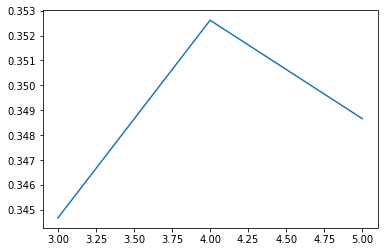

In [46]:
results = pickle.load(open("lda_ml_pickles/topics_to_coherence.pickle","rb"))
sns.lineplot(x=[c for c in results],y=[results[c] for c in results])

In [48]:
start = time()
vis2 = pyLDAvis.gensim.prepare(pickle.load(open("lda_ml_pickles/lda_mp_4_topics_55295_songs.pickle","rb")), corpus, id2word)
end = time()
print("took {} seconds".format(end-start))
vis2

/home/chinmay/miniconda3/envs/stats_cap/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


took 105.26428079605103 seconds


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.139724  0.082285       1        1  38.916840
3      0.146874 -0.029961       2        1  28.074493
0     -0.075829 -0.134319       3        1  23.875065
1     -0.210768  0.081995       4        1   9.133606, topic_info=     Category           Freq   Term          Total  loglift  logprob
62    Default  169217.000000   love  169217.000000  30.0000  30.0000
110   Default   83109.000000   yeah   83109.000000  29.0000  29.0000
38    Default   54741.000000   girl   54741.000000  28.0000  28.0000
37    Default  180688.000000    get  180688.000000  27.0000  27.0000
74    Default   94444.000000     oh   94444.000000  26.0000  26.0000
60    Default  109073.000000   like  109073.000000  25.0000  25.0000
8     Default   88302.000000   baby   88302.000000  24.0000  24.0000
51    Default  157637.000000    i'm  157637.000000  23.0000  23.0000
70    Default   24212.000000  nigga   24212.000000  22.0000  22.0000
2     Default   40421.000000  ain't   40421.000000  21.0000  21.0000
77    Default   22417.000000    ooh   22417.000000  20.0000  20.0000
48    Default   27319.000000    hey   27319.000000  19.0000  19.0000
661   Default   21350.000000     la   21350.000000  18.0000  18.0000
571   Default   19906.000000   talk   19906.000000  17.0000  17.0000
35    Default   16063.000000   fuck   16063.000000  16.0000  16.0000
537   Default   60103.000000   want   60103.000000  15.0000  15.0000
9     Default   12738.000000    bad   12738.000000  14.0000  14.0000
594   Default   12300.000000     na   12300.000000  13.0000  13.0000
15    Default   15611.000000  bitch   15611.000000  12.0000  12.0000
88    Default   13539.000000   shit   13539.000000  11.0000  11.0000
198   Default   14145.000000   rock   14145.000000  10.0000  10.0000
828   Default    9673.000000     uh    9673.000000   9.0000   9.0000
46    Default   35226.000000  heart   35226.000000   8.0000   8.0000
590   Default   19182.000000     ya   19182.000000   7.0000   7.0000
66    Default   13278.000000  money   13278.000000   6.0000   6.0000
921   Default   19631.000000  dance   19631.000000   5.0000   5.0000
561   Default   10286.000000   body   10286.000000   4.0000   4.0000
59    Default   63974.000000    let   63974.000000   3.0000   3.0000
790   Default    9162.000000     ah    9162.000000   2.0000   2.0000
113   Default   41428.000000  wanna   41428.000000   1.0000   1.0000
...       ...            ...    ...            ...      ...      ...
828    Topic4    6049.323242     uh    9673.797852   1.9237  -4.7797
4077   Topic4     892.723999   rack     962.722107   2.3177  -6.6931
38     Topic4   22554.929688   girl   54741.085938   1.5065  -3.4637
9      Topic4    6808.969238    bad   12738.933594   1.7668  -4.6614
998    Topic4    2144.358154     ba    2918.059082   2.0851  -5.8168
790    Topic4    5062.255371     ah    9162.721680   1.7999  -4.9578
1331   Topic4    2382.452637  chain    3409.496094   2.0348  -5.7115
77     Topic4    9273.121094    ooh   22417.093750   1.5105  -4.3525
561    Topic4    5168.339844   body   10286.075195   1.7050  -4.9371
48     Topic4   10310.335938    hey   27319.988281   1.4187  -4.2465
571    Topic4    7767.176758   talk   19906.488281   1.4521  -4.5297
802    Topic4    2860.225342    huh    4582.986328   1.9218  -5.5288
679    Topic4    3815.718262    hot    7437.995117   1.7257  -5.2405
2      Topic4   11267.552734  ain't   40421.570312   1.1158  -4.1577
60     Topic4   19898.646484   like  109073.523438   0.6918  -3.5890
51     Topic4   18197.064453    i'm  157637.875000   0.2342  -3.6784
37     Topic4   18493.873047    get  180688.281250   0.1139  -3.6622
74     Topic4   10627.255859     oh   94444.289062   0.2086  -4.2162
16     Topic4    5074.180664    boy   19485.425781   1.0477  -4.9555
66     Topic4    4281.755859  money   13278.074219   1.2615  -5.1253
531    Topic4    5689.315430   look   38254.7